In [1]:
from LIMxCMBL.init import *

In [2]:
from tqdm import trange

In [3]:
c1 = plt.cm.rainbow(np.linspace(0, 1, len(deltas)))[::-1]
c2 = plt.cm.rainbow(np.linspace(0, 1, len(chibs)))

In [4]:
print(chibs)

[1.00000000e+01 1.83947289e+02 3.57894577e+02 5.31841866e+02
 7.05789155e+02 8.79736443e+02 1.05368373e+03 1.22763102e+03
 1.40157831e+03 1.57552560e+03 1.74947289e+03 1.92342017e+03
 2.09736746e+03 2.27131475e+03 2.44526204e+03 2.61920933e+03
 2.79315662e+03 2.96710391e+03 3.14105120e+03 3.31499848e+03
 3.48894577e+03 3.66289306e+03 3.83684035e+03 4.01078764e+03
 4.18473493e+03 4.35868222e+03 4.53262950e+03 4.70657679e+03
 4.88052408e+03 5.05447137e+03 5.22841866e+03 5.40236595e+03
 5.57631324e+03 5.75026052e+03 5.92420781e+03 6.09815510e+03
 6.27210239e+03 6.44604968e+03 6.61999697e+03 6.79394426e+03
 6.96789155e+03 7.14183883e+03 7.31578612e+03 7.48973341e+03
 7.66368070e+03 7.83762799e+03 8.01157528e+03 8.18552257e+03
 8.35946985e+03 8.53341714e+03 8.70736443e+03 8.88131172e+03
 9.05525901e+03 9.22920630e+03 9.40315359e+03 9.57710087e+03
 9.75104816e+03 9.92499545e+03 1.00989427e+04 1.02728900e+04
 1.04468373e+04 1.06207846e+04 1.07947319e+04 1.09686792e+04]


In [5]:
c1.shape

(128, 4)

  0%|          | 0/100 [00:00<?, ?it/s]

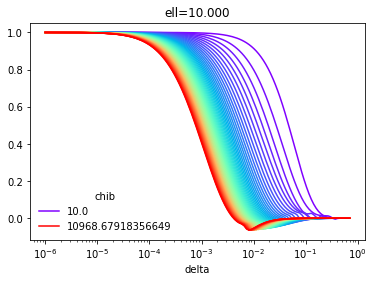

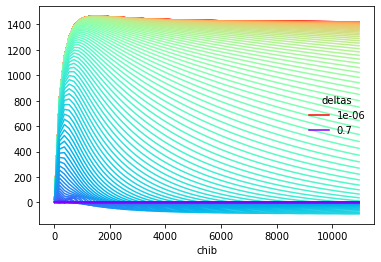

  1%|          | 1/100 [00:01<01:42,  1.04s/it]

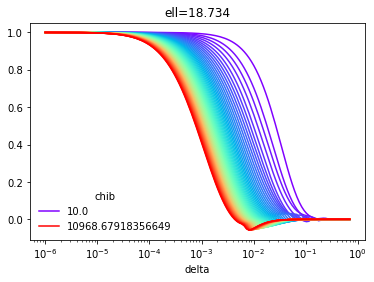

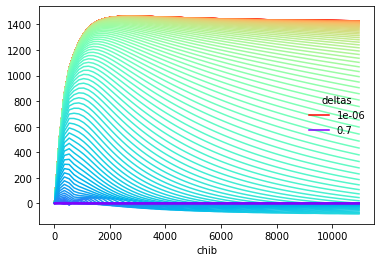

 11%|█         | 11/100 [00:01<00:13,  6.54it/s]

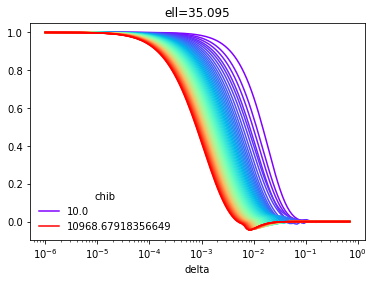

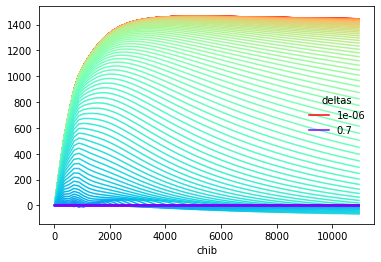

 21%|██        | 21/100 [00:02<00:09,  8.29it/s]

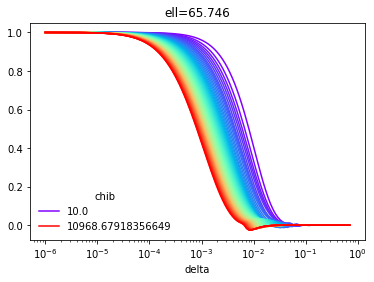

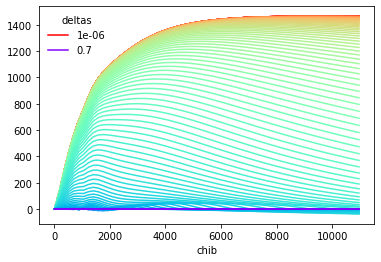

 31%|███       | 31/100 [00:03<00:06,  9.95it/s]

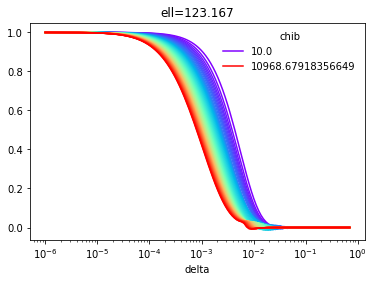

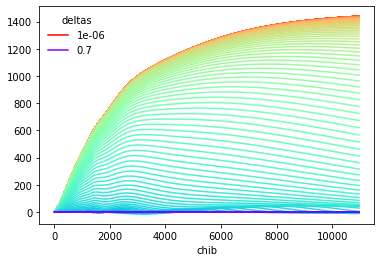

 41%|████      | 41/100 [00:04<00:05, 11.38it/s]

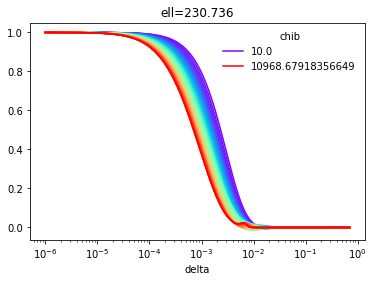

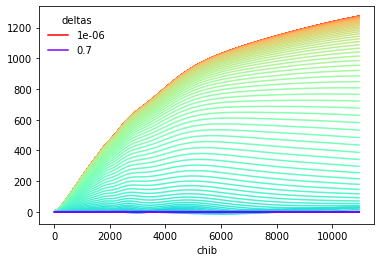

 51%|█████     | 51/100 [00:05<00:04, 12.10it/s]

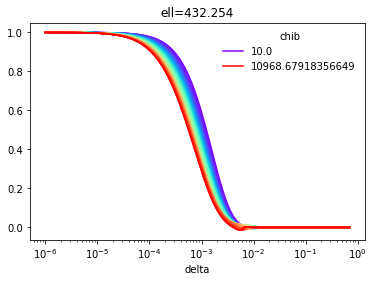

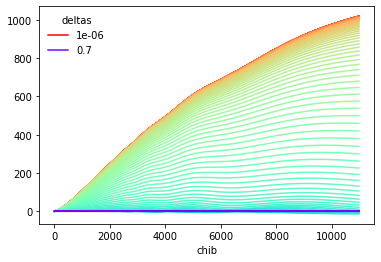

 61%|██████    | 61/100 [00:05<00:03, 12.97it/s]

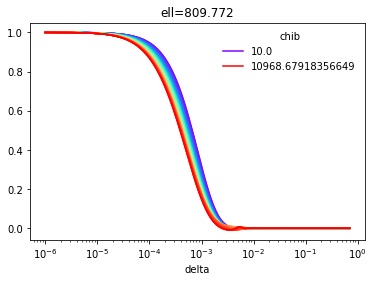

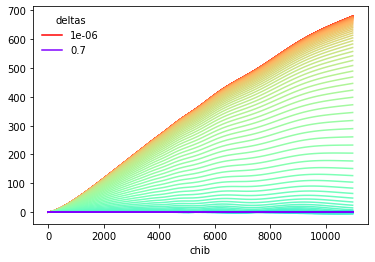

 71%|███████   | 71/100 [00:06<00:02, 13.22it/s]

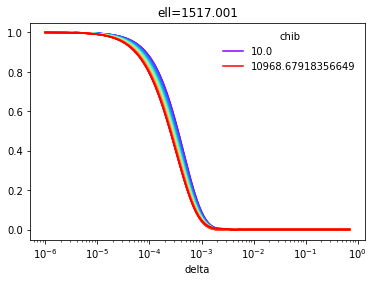

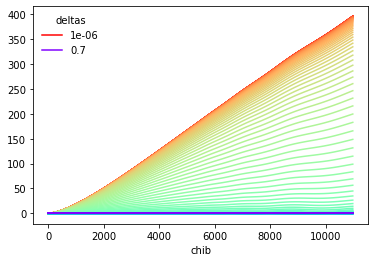

 81%|████████  | 81/100 [00:07<00:01, 13.72it/s]

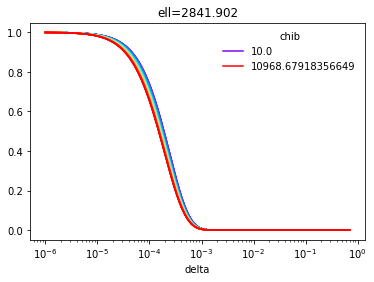

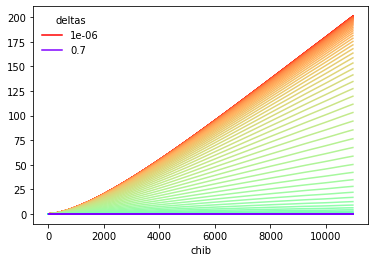

100%|██████████| 100/100 [00:07<00:00, 12.67it/s]


In [6]:
oup = np.zeros((len(ells), len(chibs), len(deltas)), dtype=np.float128)
for ell_idx in trange(len(ells)):
    ell = ells[ell_idx]
    oup_fname = '/scratch/users/delon/LIMxCMBL/dkparp_integral/ell_%.8f.npy'%(ell)
    oup[ell_idx] = np.load(oup_fname)
    if(ell_idx % 10 !=0):
        continue
#     plt.figure(figsize=(8.5,11))
    for chib_idx, c in enumerate(c2):
        plt.plot(deltas, 
                 oup[ell_idx][chib_idx]/np.max(oup[ell_idx][chib_idx], axis=-1), 
                 label=chibs[chib_idx] if (chib_idx ==0 or chib_idx == len(c2)-1) else None, 
                 c=c)
    plt.xlabel('delta')
    plt.xscale('log')
    plt.legend(frameon=False, title='chib')
    plt.title('ell=%.3f'%(ell))
    plt.show()
    
#     plt.figure(figsize=(8.5,22))
    for i, c in enumerate(c1):
        plt.plot(chibs, 
                 oup[ell_idx,:,i], 
                 label=deltas[i] if (i ==0 or i == len(c1)-1) else None, 
                 c=c)

    plt.xlabel('chib')
    plt.legend(frameon=False, title='deltas')
    plt.show()


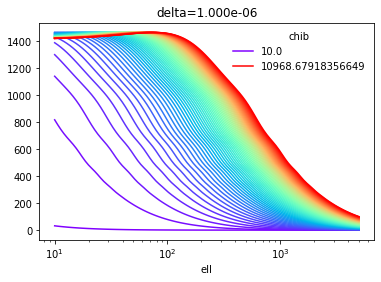

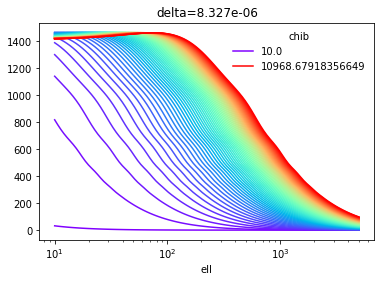

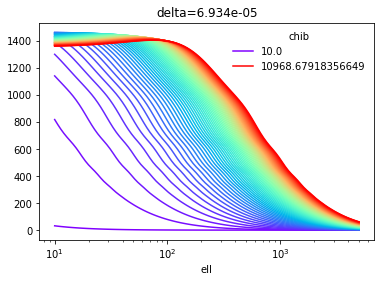

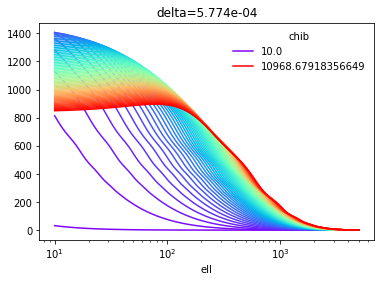

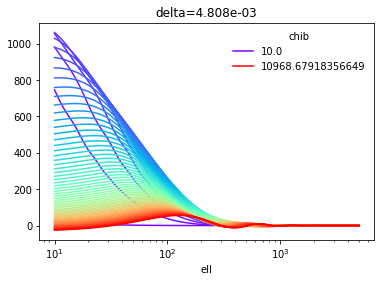

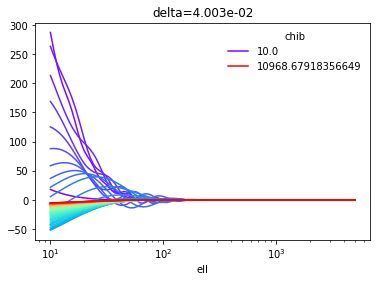

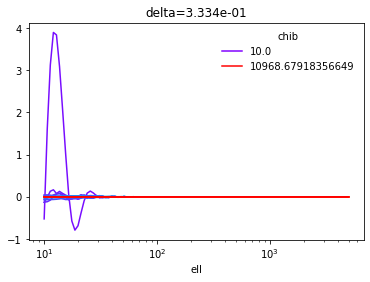

In [7]:
for delta_idx in range(len(deltas)):
    if(delta_idx % 20 != 0):
        continue
    for chib_idx in range(len(chibs)):
        plt.plot(ells, 
                 oup[:,chib_idx,delta_idx], 
                 label=chibs[chib_idx] if (chib_idx ==0 or chib_idx == len(c2)-1) else None, 
                 c=c2[chib_idx])
    plt.legend(frameon=False, title='chib', loc='upper right')
    plt.xlabel('ell')
    plt.xscale('log')
    plt.title('delta=%.3e'%(deltas[delta_idx]))
    plt.show()

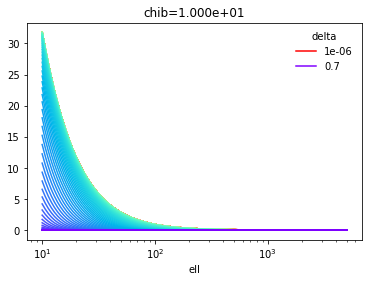

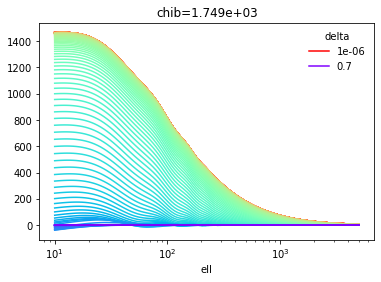

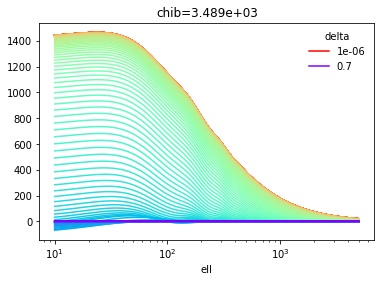

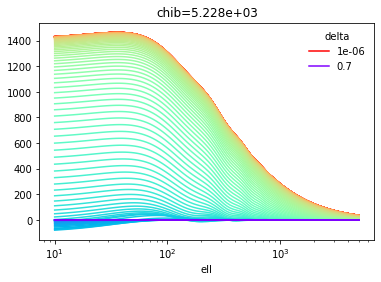

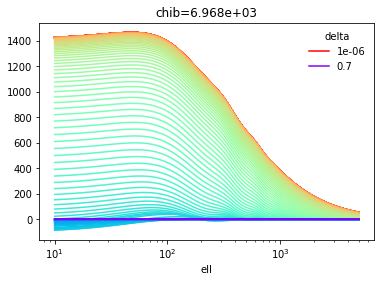

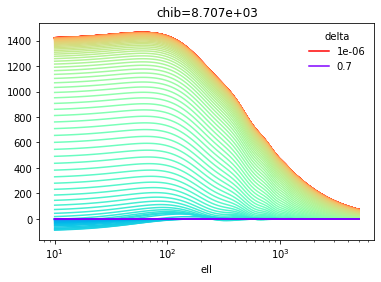

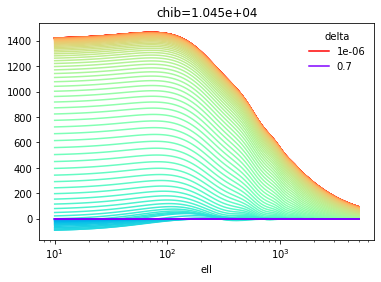

In [8]:
for chib_idx in range(len(chibs)):
    if(chib_idx % 10 != 0):
        continue
    for delta_idx in range(len(deltas)):
        plt.plot(ells, 
                 oup[:,chib_idx,delta_idx], 
                 label=deltas[delta_idx] if (delta_idx ==0 or delta_idx == len(c1)-1) else None, 
                 c=c1[delta_idx])
    plt.legend(frameon=False, title='delta', loc='upper right')
    plt.xlabel('ell')
    plt.xscale('log')
    plt.title('chib=%.3e'%(chibs[chib_idx]))
    plt.show()

In [9]:
oup.shape

(100, 64, 128)

In [10]:
np.save('/oak/stanford/orgs/kipac/users/delon/LIMxCMBL/inner_dkparp_integral.npy', oup)